In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
data = boston.data

In [7]:
type(data)

numpy.ndarray

In [8]:
np.set_printoptions(suppress=True)

In [9]:
data.shape

(506, 13)

In [10]:
# boston.target - величина которую следует предсказать 
# boston.feature_names - названия признаков

In [11]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
feature_names = boston.feature_names

In [13]:
X = pd.DataFrame(data, columns=feature_names)

In [14]:
target = boston.target

In [15]:
X.shape

(506, 13)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [17]:
y = pd.DataFrame(target, columns=['price'])

In [18]:
y.head(5)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [19]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)

In [26]:
y_pred.shape

(152, 1)

In [27]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

In [28]:
check_test.head(20)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [29]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

In [30]:
check_test.head(10)

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280
76,20.0,23.146689,3.146689
316,17.8,17.392124,-0.407876
140,14.0,14.078599,0.078599
471,19.6,23.036927,3.436927
500,16.8,20.599433,3.799433


In [31]:
mse1 = (check_test["error"]**2).mean()

In [32]:
mse1

21.517444231177265

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(check_test["y_pred"], check_test["y_test"])

21.51744423117726

In [35]:
(np.abs(check_test["error"])).mean()

3.1627098714574124

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mean_absolute_error(check_test["y_pred"], check_test["y_test"])

3.1627098714574124

In [38]:
from sklearn.metrics import r2_score 

In [39]:
?r2_score

In [40]:
r2_score(check_test["y_test"], check_test["y_pred"])

0.7112260057484925

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
?RandomForestRegressor

In [43]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [44]:
rfr.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [45]:
y_pred = rfr.predict(X_test)

In [46]:
y_pred

array([22.80641237, 31.13146352, 16.33912494, 23.81072598, 17.13952074,
       21.8322837 , 19.89574701, 14.75411774, 21.2408346 , 20.89865761,
       20.2028696 , 19.95659298,  8.03651316, 21.51673023, 19.36048089,
       25.28222025, 18.82002442,  8.47636459, 45.9477    , 15.50141896,
       24.37448371, 23.98037718, 14.54950214, 23.57447941, 15.05119767,
       15.23703316, 21.59141811, 13.90617333, 19.67698308, 21.0552311 ,
       19.69950085, 23.2483229 , 29.99451024, 20.15961264, 14.39724675,
       16.02131035, 34.26043401, 19.19342625, 21.17764473, 24.22833434,
       18.60497   , 29.57765089, 45.5585    , 19.62038232, 22.575541  ,
       14.0331484 , 15.76855872, 24.50013129, 19.15469322, 28.28791716,
       21.35262285, 33.89102953, 17.67031122, 26.25583284, 45.51992393,
       21.89588357, 15.85210261, 32.38172361, 22.14020328, 20.61773671,
       25.39990971, 33.63617562, 30.10425708, 18.97044937, 27.14227131,
       16.90607   , 13.90610446, 23.10904339, 28.86343833, 15.57

In [47]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred,
})

In [48]:
check_test

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
...,...,...
441,17.1,13.521640
23,14.5,15.112621
225,50.0,42.808700
433,14.3,15.586103


In [49]:
r2_score(check_test["y_test"], check_test["y_pred"])

0.87472606157312

In [50]:
?RandomForestRegressor

In [53]:
import matplotlib.pyplot as plt

In [66]:
rfr.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [65]:
np.sum(rfr.feature_importances_)

1.0

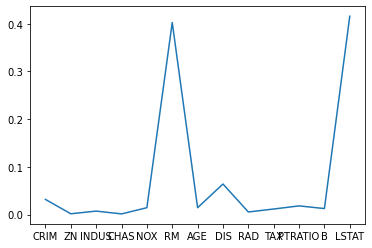

In [63]:
imp = plt.plot(X.columns, rfr.feature_importances_, )

In [ ]:
# Наибольшая важность RM, LSTAT - среднее количество комнат в одном помещении, процент населения с пониженным статусом